analysis.md and score_distribution.png generated.


/tmp/ipykernel_36354/415675688.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_distribution.index, y=score_distribution.values, palette="crest")


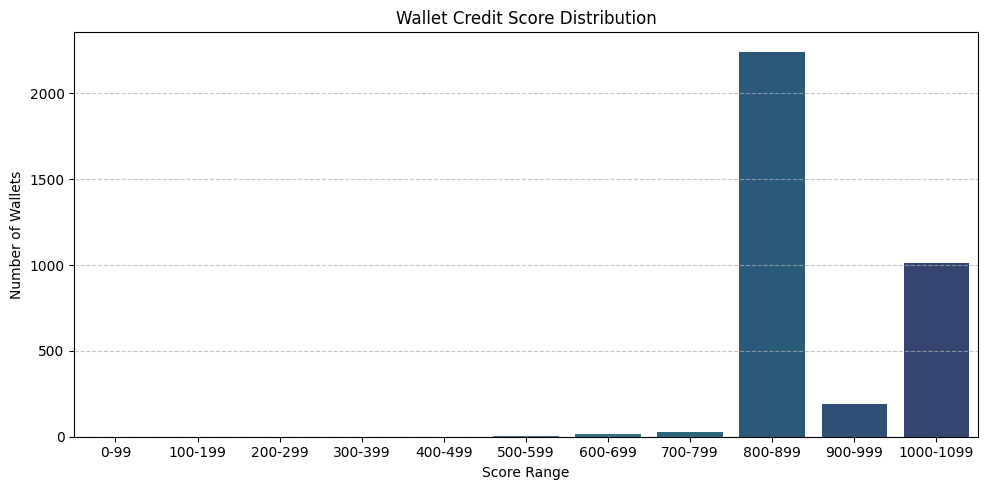

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load wallet scores
df = pd.read_csv("wallet_scores.csv")

#Define score bins and labels
bins = list(range(0, 1101, 100))
labels = [f"{i}-{i+99}" for i in bins[:-1]]
df['score_range'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=False)

#Score distribution table
score_distribution = df['score_range'].value_counts().sort_index()

#Save histogram as image
plt.figure(figsize=(10, 5))
sns.barplot(x=score_distribution.index, y=score_distribution.values, palette="crest")
plt.title("Wallet Credit Score Distribution")
plt.xlabel("Score Range")
plt.ylabel("Number of Wallets")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("score_distribution.png")

#Analyze behavior of low and high score wallets
low_score_wallets = df[df['credit_score'] < 300]
high_score_wallets = df[df['credit_score'] >= 800]

def summarize_group(group, label):
    return f"""
### Behavior of Wallets in the {label} Score Range

- Average Deposit: ${group['total_deposit'].mean():,.2f}
- Average Borrow: ${group['total_borrow'].mean():,.2f}
- Average Repay: ${group['total_repay'].mean():,.2f}
- Average Repay-to-Borrow Ratio: {group['repay_to_borrow'].mean():.2f}
- Average Borrow-to-Deposit Ratio: {group['borrow_to_deposit'].mean():.2f}
- Average Liquidations: {group['liquidations'].mean():.2f}
- Average Transactions per Month: {group['tx_per_month'].mean():.2f}
"""

#Generate markdown content
markdown = [
    "# Credit Score Analysis of Aave V2 Wallets",
    "",
    "This analysis evaluates wallet behavior using credit scores generated from transaction history.",
    "",
    "## Score Distribution",
    "",
    "| Score Range | Number of Wallets |"
]

for label, count in score_distribution.items():
    markdown.append(f"| {label} | {count} |")

markdown += [
    "",
    
    summarize_group(low_score_wallets, "Low (0–299)"),
    summarize_group(high_score_wallets, "High (800–1000)"),
    "",
    "## Key Observations",
    "- Low-score wallets tend to have low repay activity, high borrow-deposit ratios, and liquidation events.",
    "- High-score wallets show healthy repay behavior, high deposit activity, and minimal liquidations.",
    "- Score distribution is skewed toward responsible DeFi users.",
    "",
    "## Future Work",
    "- Improve score granularity using time-series patterns",
    "- Use anomaly detection for bot behavior",
    "- Extend to other DeFi protocols for cross-platform reliability scoring"
]

# Step 7: Save to analysis.md
with open("analysis.md", "w") as f:
    f.write("\n".join(markdown))

print("analysis.md and score_distribution.png generated.")
